In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/var/folders/n9/c8x8hdwj3rq05yzhrqxbkc7h0000gn/T/ipykernel_21167/2095697874.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv("/Users/chenxiaofeng/Desktop/heart_2022_with_nans.csv")
print(len(df))
print(df.dtypes)

445132
State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               o

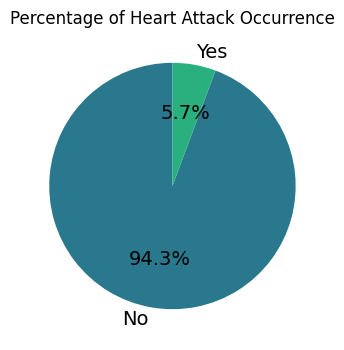

In [3]:
#EDA Step 1: Univariate Analysis
had_heart_attack_counts = df['HadHeartAttack'].value_counts()
labels = had_heart_attack_counts.index
sizes = had_heart_attack_counts.values
colors=["#2a788e",'#2ab07f']
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of Heart Attack Occurrence')
plt.show()

In [4]:
df.shape

(445132, 40)

In [5]:
df.info

<bound method DataFrame.info of                  State     Sex GeneralHealth  PhysicalHealthDays  \
0              Alabama  Female     Very good                 0.0   
1              Alabama  Female     Excellent                 0.0   
2              Alabama  Female     Very good                 2.0   
3              Alabama  Female     Excellent                 0.0   
4              Alabama  Female          Fair                 2.0   
...                ...     ...           ...                 ...   
445127  Virgin Islands  Female          Good                 0.0   
445128  Virgin Islands  Female     Excellent                 2.0   
445129  Virgin Islands  Female          Poor                30.0   
445130  Virgin Islands    Male     Very good                 0.0   
445131  Virgin Islands    Male     Very good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
0                    0.0  Within past year (anytime less than 12 months 

In [6]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [7]:
df.duplicated().sum()

157

In [8]:
#Data Clening Step 1: Remove duplicate rows
df= df.drop_duplicates()

In [9]:
df = df.dropna( subset=['HadHeartAttack'] )

In [10]:
df.shape

(441915, 40)

In [11]:
df.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1095
PhysicalHealthDays           10597
MentalHealthDays              8792
LastCheckupTime               8039
PhysicalActivities             972
SleepHours                    5196
RemovedTeeth                 11010
HadHeartAttack                   0
HadAngina                     3588
HadStroke                     1070
HadAsthma                     1437
HadSkinCancer                 2764
HadCOPD                       1838
HadDepressiveDisorder         2421
HadKidneyDisease              1614
HadArthritis                  2313
HadDiabetes                    813
DeafOrHardOfHearing          20138
BlindOrVisionDifficulty      21050
DifficultyConcentrating      23655
DifficultyWalking            23464
DifficultyDressingBathing    23373
DifficultyErrands            25091
SmokerStatus                 34800
ECigaretteUsage              35002
ChestScan                    55147
RaceEthnicityCategor

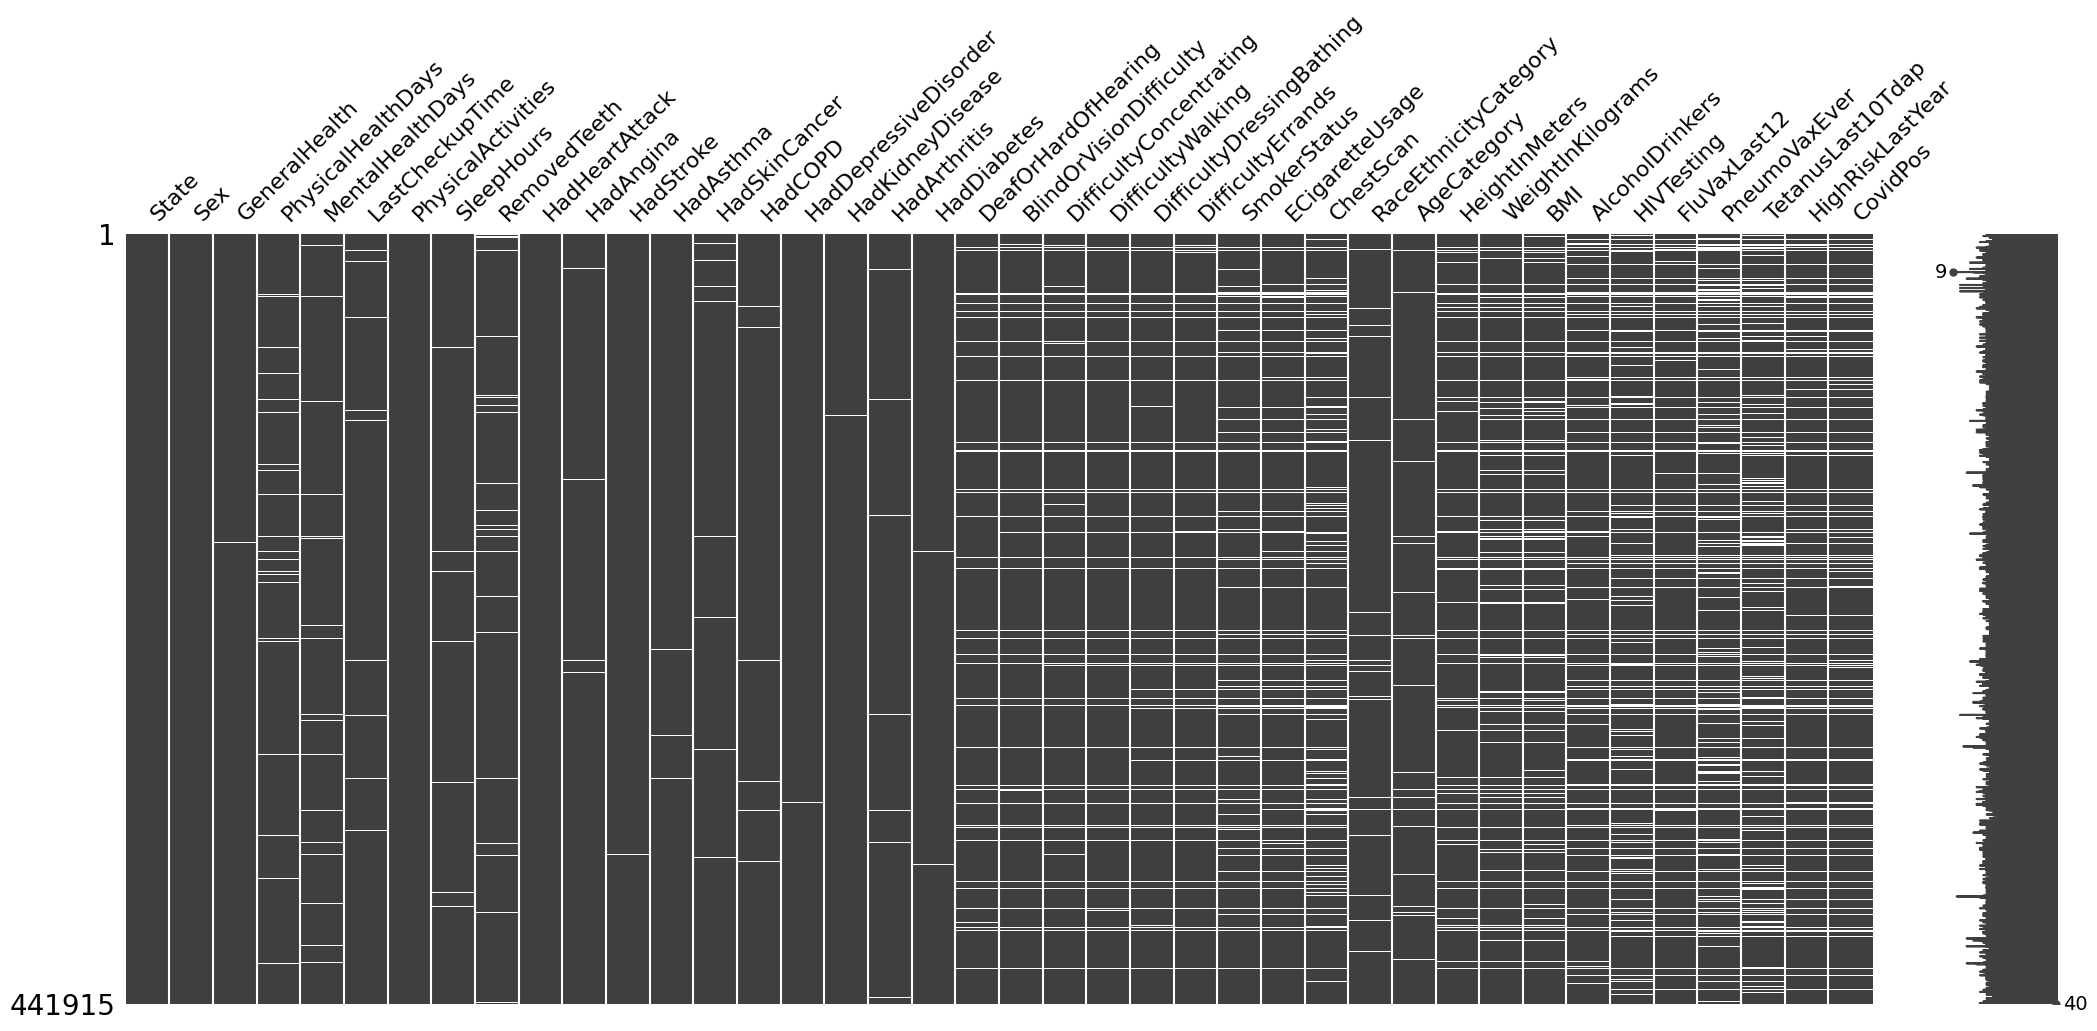

<Figure size 2500x1000 with 0 Axes>

In [12]:
#EDA step2: missing value analysis
import missingno as msno
msno.matrix(df)
plt.figure(figsize = (25,10))
plt.show()

In [13]:
df.nunique()

State                          54
Sex                             2
GeneralHealth                   5
PhysicalHealthDays             31
MentalHealthDays               31
LastCheckupTime                 4
PhysicalActivities              2
SleepHours                     24
RemovedTeeth                    4
HadHeartAttack                  2
HadAngina                       2
HadStroke                       2
HadAsthma                       2
HadSkinCancer                   2
HadCOPD                         2
HadDepressiveDisorder           2
HadKidneyDisease                2
HadArthritis                    2
HadDiabetes                     4
DeafOrHardOfHearing             2
BlindOrVisionDifficulty         2
DifficultyConcentrating         2
DifficultyWalking               2
DifficultyDressingBathing       2
DifficultyErrands               2
SmokerStatus                    4
ECigaretteUsage                 4
ChestScan                       2
RaceEthnicityCategory           5
AgeCategory   

In [14]:
for feature in df.columns:
    print(feature)
    print(df[feature].unique(),"\n")

State
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands'] 

Sex
['Female' 'Male'] 

GeneralHealth
['Very good' 'Excellent' 'Fair' 'Poor' 'Good' nan] 

PhysicalHealthDays
[ 0.  2.  1.  8.  5. 30.  4. 23. 14. nan 15.  3. 10.  7. 25.  6. 21. 20.
 29. 16.  9. 27. 28. 12. 13. 11. 26. 17. 24. 19. 18. 22.] 

MentalHealthDays
[ 0.  3.  9.  5. 15. 20. 14. 10. 18.  1. nan  2. 30.  4.  6.  7. 25.  8.
 22. 29. 27. 21

In [15]:
#Data cleaning step 2 : Drop unwanted column
df= df.drop(columns=['RemovedTeeth', 'LastCheckupTime', 'ChestScan','DeafOrHardOfHearing','BlindOrVisionDifficulty',
                     'DifficultyConcentrating','DifficultyWalking','DifficultyDressingBathing','HadSkinCancer',
                     'DifficultyErrands','HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
                     'ECigaretteUsage','HighRiskLastYear',"HeightInMeters","WeightInKilograms","CovidPos","RaceEthnicityCategory"])

In [16]:
df.shape

(441915, 20)

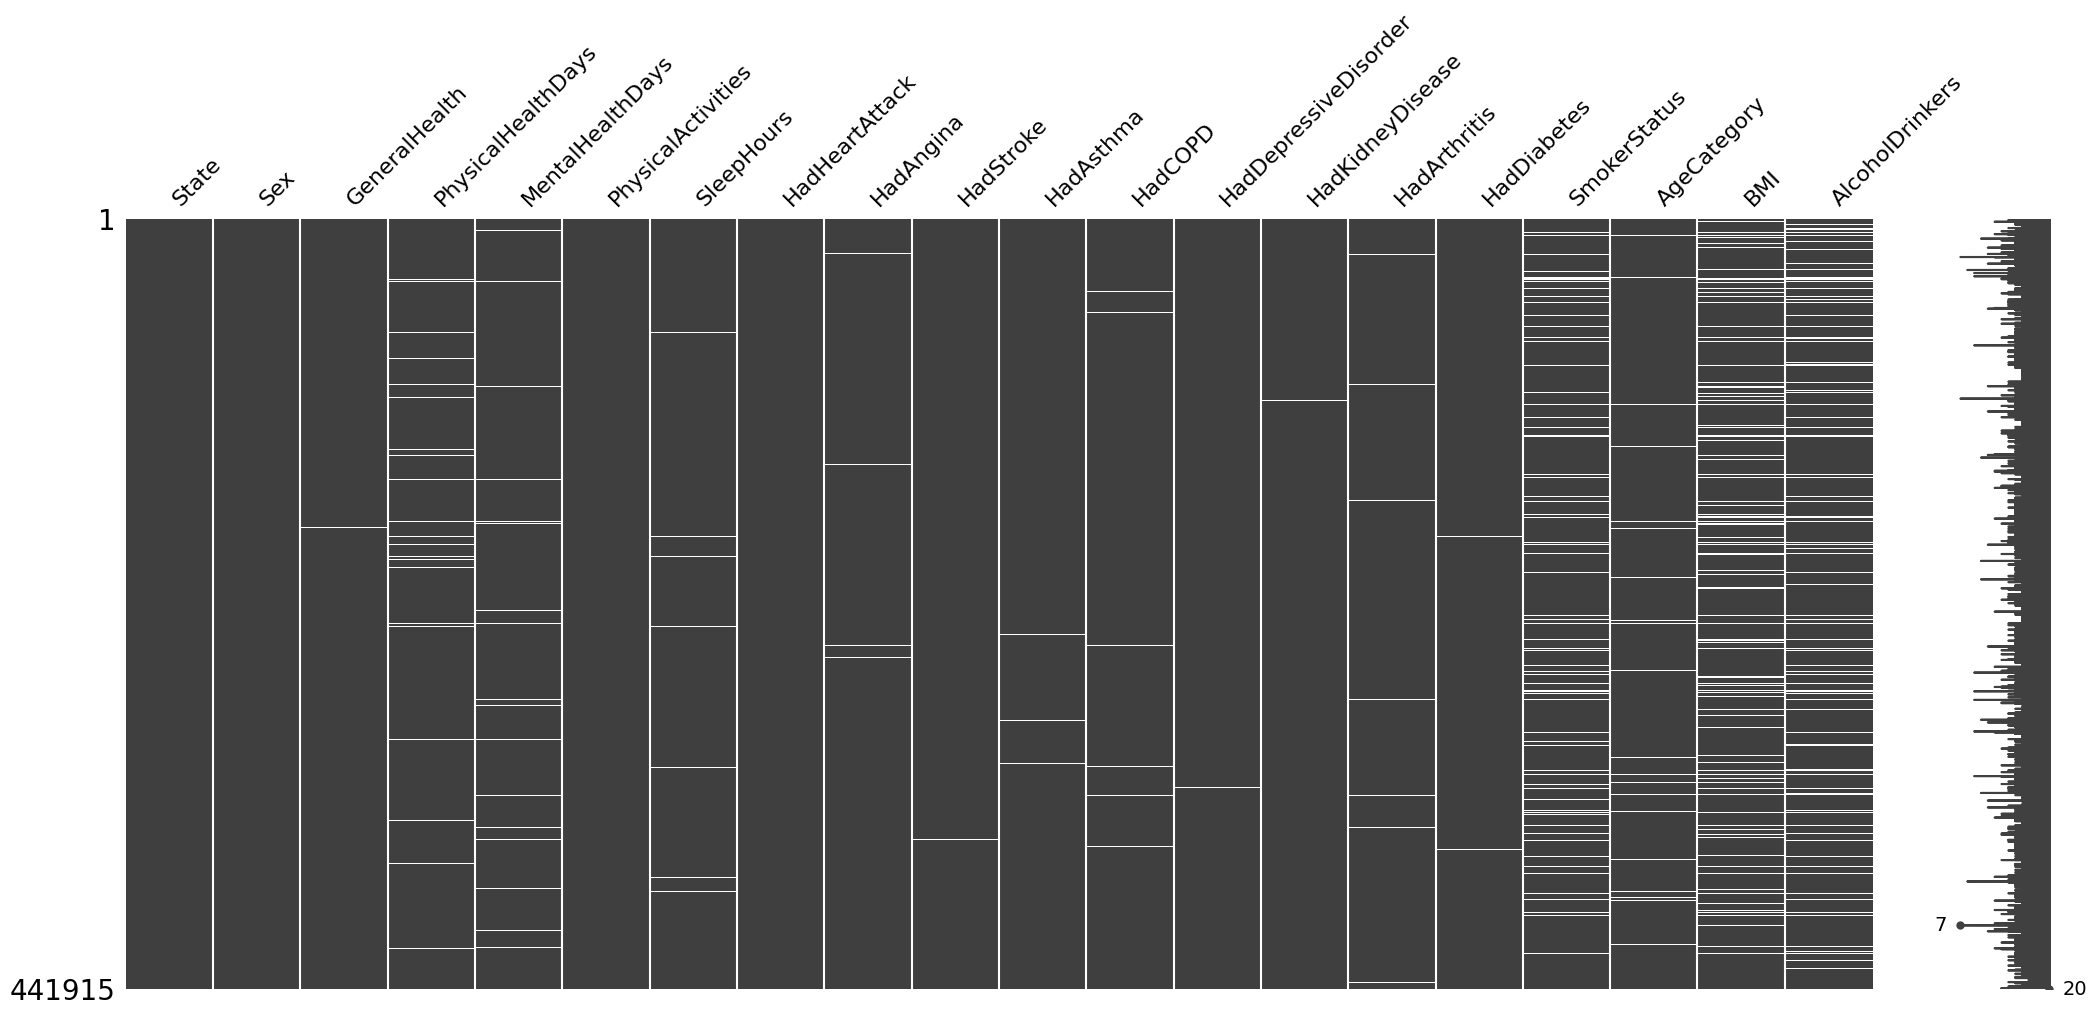

<Figure size 2500x1000 with 0 Axes>

In [17]:
#EDA step 2: missing value analysis
import missingno as msno
msno.matrix(df)
plt.figure(figsize = (25,10))
plt.show()

In [18]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth             1095
PhysicalHealthDays       10597
MentalHealthDays          8792
PhysicalActivities         972
SleepHours                5196
HadHeartAttack               0
HadAngina                 3588
HadStroke                 1070
HadAsthma                 1437
HadCOPD                   1838
HadDepressiveDisorder     2421
HadKidneyDisease          1614
HadArthritis              2313
HadDiabetes                813
SmokerStatus             34800
AgeCategory               8802
BMI                      47968
AlcoholDrinkers          45796
dtype: int64

In [19]:
df['HadHeartAttack'].value_counts()

HadHeartAttack
No     416807
Yes     25108
Name: count, dtype: int64

In [20]:
for feature in df.columns:
    print(feature)
    print(df[feature].unique())
    print(df[feature].value_counts())

State
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
State
Washington              25987
New York                17615
Minnesota               16733
Ohio                    16389
Maryland                16291
Texas                   14121
Florida                 13274
Wisconsin               11207
Kansas                  11175
Massachusetts           10956
California              10850
Maine         

In [21]:
df['SmokerStatus'].value_counts()

SmokerStatus
Never smoked                             244607
Former smoker                            113004
Current smoker - now smokes every day     35682
Current smoker - now smokes some days     13822
Name: count, dtype: int64

In [22]:
# Data cleaning step 3: Data standardization
df['SmokerStatus'].replace({'Never smoked' : 'Never'}, inplace=True)
df['SmokerStatus'].replace({'Former smoker' : 'Former'}, inplace=True)
df['SmokerStatus'].replace({'Current smoker - now smokes some days' : 'Sometimes'}, inplace=True)
df['SmokerStatus'].replace({'Current smoker - now smokes every day' : 'Everyday'}, inplace=True)
df['SmokerStatus'].value_counts()

SmokerStatus
Never        244607
Former       113004
Everyday      35682
Sometimes     13822
Name: count, dtype: int64

In [23]:
#Data cleaning step 4: categorical data consolidation
age_mapping = {
    'Age 80 or older': '80+',
    'Age 55 to 59': '55-59',
    'Age 40 to 44': '40-44',
    'Age 75 to 79': '75-79',
    'Age 70 to 74': '70-74',
    'Age 65 to 69': '65-69',
    'Age 60 to 64': '60-64',
    'Age 50 to 54': '50-54',
    'Age 45 to 49': '45-49',
    'Age 35 to 39': '35-39',
    'Age 25 to 29': '25-29',
    'Age 30 to 34': '30-34',
    'Age 18 to 24': '18-24'
}
df['AgeCategory'] = df['AgeCategory'].map(age_mapping)
df['AgeCategory'] = df['AgeCategory'].map(age_mapping).fillna(df['AgeCategory'])
df['AgeCategory'].value_counts()


AgeCategory
65-69    46793
60-64    44191
70-74    43194
55-59    36611
80+      35736
50-54    33436
75-79    32231
40-44    29778
45-49    28392
35-39    28371
18-24    26792
30-34    25687
25-29    21901
Name: count, dtype: int64

<Axes: >

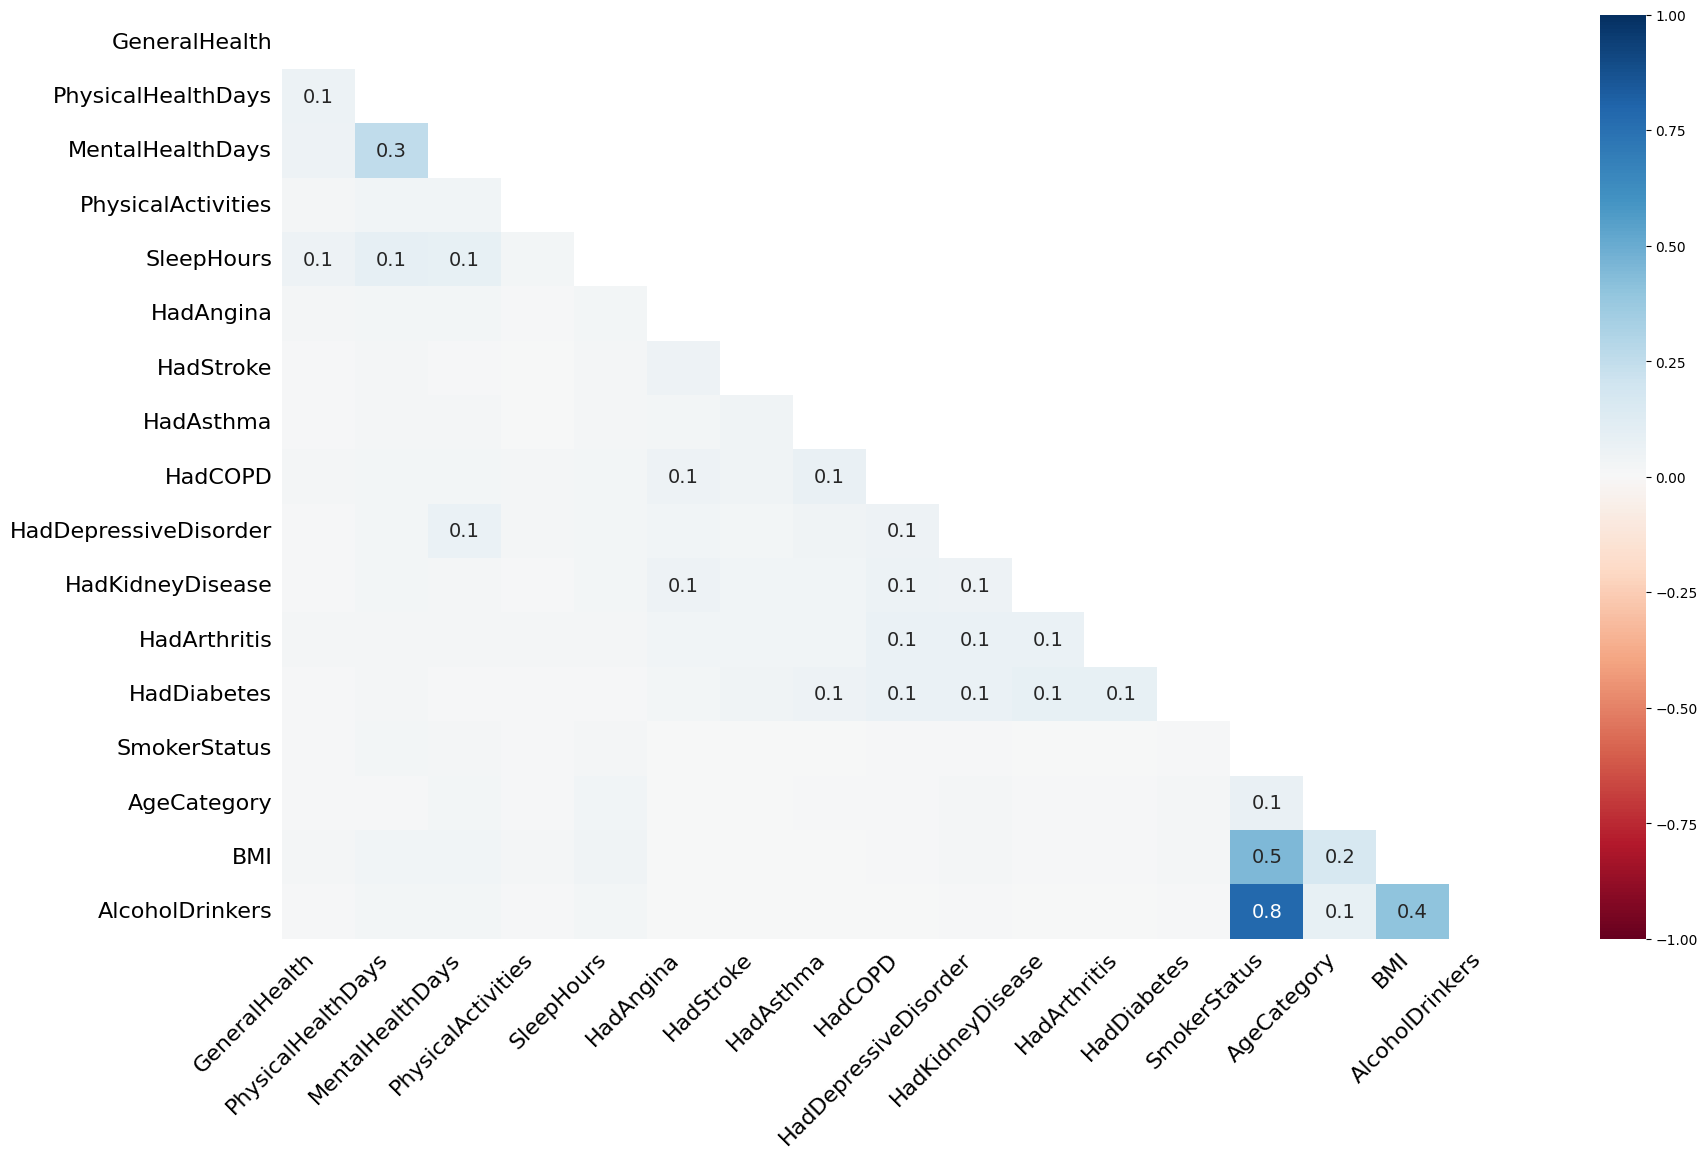

In [24]:
#EDA Step 3: nullity correlation
msno.heatmap(df,labels = True)

In [25]:
df["BMI"].value_counts()

BMI
26.63    4236
27.46    3260
24.41    3167
27.44    3115
27.12    3101
         ... 
47.38       1
59.13       1
20.17       1
47.28       1
48.63       1
Name: count, Length: 3977, dtype: int64

In [26]:
df.shape

(441915, 20)

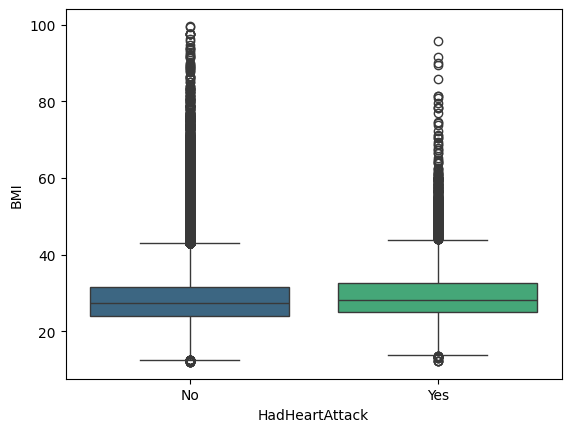

In [27]:
sns.boxplot(x="HadHeartAttack", y="BMI", data=df, palette='viridis')
plt.show()

In [28]:
df['HadHeartAttack'].value_counts()

HadHeartAttack
No     416807
Yes     25108
Name: count, dtype: int64

In [29]:
#Data cleaning 5: Check outlier
df_t=df.copy()
df_filtered = df_t[(df_t['BMI'] <= 50) | (df_t['BMI'].isnull())]
df_filtered.shape

(438327, 20)

In [30]:
df_filtered['HadHeartAttack'].value_counts()

HadHeartAttack
No     413468
Yes     24859
Name: count, dtype: int64

In [31]:
df = df[(df['BMI'] <= 50) | (df['BMI'].isnull())]
df['HadHeartAttack'].value_counts()

HadHeartAttack
No     413468
Yes     24859
Name: count, dtype: int64

In [32]:
#Data Cleaning 6: Missing Value Imputation
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
df[["BMI"]]=imputer.fit_transform(df[["BMI"]])
df["BMI"].value_counts()

BMI
28.270292    47968
26.630000     4236
27.460000     3260
24.410000     3167
27.440000     3115
             ...  
33.710000        1
13.890000        1
46.750000        1
43.450000        1
48.630000        1
Name: count, Length: 3079, dtype: int64

In [33]:
#Data cleaning step 7: Missing Value Imputation
columns_to_fill = ["PhysicalHealthDays", "MentalHealthDays", "SleepHours"]
for col in columns_to_fill:
    df[col] = df[col].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [34]:
#Data cleaning step 8: Drop missing values
df = df.dropna(subset=['AlcoholDrinkers','AgeCategory','SmokerStatus',"HadDiabetes","HadArthritis","HadKidneyDisease","HadDepressiveDisorder",
                       "HadCOPD","HadAsthma","HadStroke","HadAngina","GeneralHealth","PhysicalActivities"] )
df.isnull().sum()
df['HadHeartAttack'].value_counts()

HadHeartAttack
No     351437
Yes     20023
Name: count, dtype: int64

In [35]:
df.isnull().sum()

State                    0
Sex                      0
GeneralHealth            0
PhysicalHealthDays       0
MentalHealthDays         0
PhysicalActivities       0
SleepHours               0
HadHeartAttack           0
HadAngina                0
HadStroke                0
HadAsthma                0
HadCOPD                  0
HadDepressiveDisorder    0
HadKidneyDisease         0
HadArthritis             0
HadDiabetes              0
SmokerStatus             0
AgeCategory              0
BMI                      0
AlcoholDrinkers          0
dtype: int64

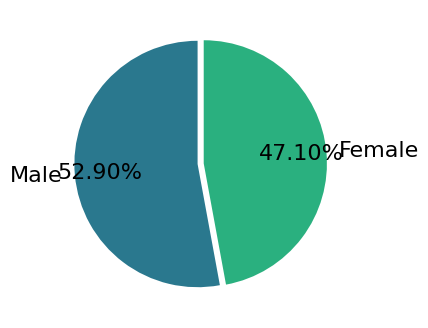

In [36]:
gender_pie=df['Sex'].value_counts()
plt.figure(figsize=(8, 4))
plt.pie(gender_pie.values,labels=['Male','Female'],autopct="%0.2f%%",explode = (0,0.05),colors=colors,shadow=False, pctdistance=0.8,startangle=90, textprops={'fontsize': 16})
plt.show()

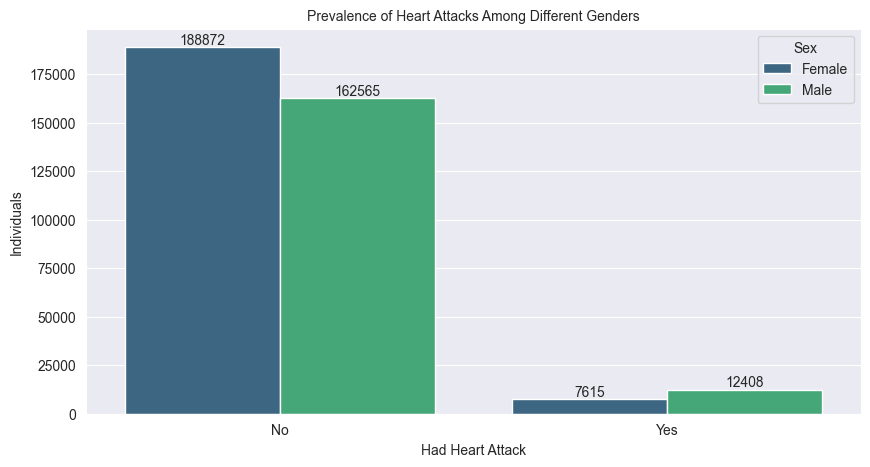

In [37]:
#EDA step 4: visualizing the distribution of a categorical variable
plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')

ax = sns.countplot(data=df, x='HadHeartAttack', hue='Sex', palette='viridis')
ax.set_title("Prevalence of Heart Attacks Among Different Genders", fontsize=10)
ax.set_xlabel("Had Heart Attack", fontsize=10)
ax.set_ylabel("Individuals", fontsize=10)

for c in ax.containers:
    ax.bar_label(c)

plt.show()

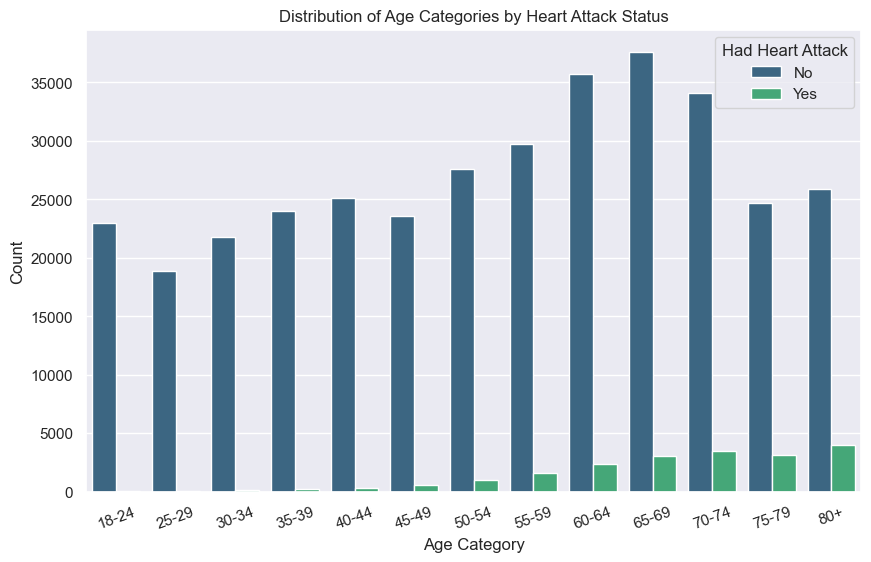

In [38]:
#EDA step 5: Distribution Analysis
sns.set(style="darkgrid")
age_category_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
plt.figure(figsize=(10, 6))
barplot = sns.countplot(x='AgeCategory', hue='HadHeartAttack', data=df, palette='viridis', order=age_category_order)
barplot.set_title('Distribution of Age Categories by Heart Attack Status')
barplot.set_xlabel('Age Category')
barplot.set_ylabel('Count')
barplot.tick_params(axis='x', rotation=20)

plt.legend(title='Had Heart Attack', loc='upper right')
plt.show()

In [39]:
df['HadDepressiveDisorder'].replace(to_replace='No', value=0, inplace=True)
df['HadDepressiveDisorder'].replace(to_replace='Yes', value=1, inplace=True)

In [40]:
health_factor_byage = df.groupby('AgeCategory').agg({'PhysicalHealthDays':'mean', 'MentalHealthDays':'mean', 'BMI':'mean'})
health_factor_byage

,PhysicalHealthDays,MentalHealthDays,BMI
AgeCategory,,,
18-24,2.534299,7.373020,26.011763
25-29,2.605941,6.555872,27.583920
30-34,2.839131,6.084434,28.323723
35-39,2.946800,5.507026,28.654599
40-44,3.391383,5.135152,29.043060
45-49,3.775422,4.826143,29.280906
50-54,4.240928,4.592966,29.403289
55-59,4.865979,4.277946,29.202484
60-64,4.995740,3.787504,28.839367


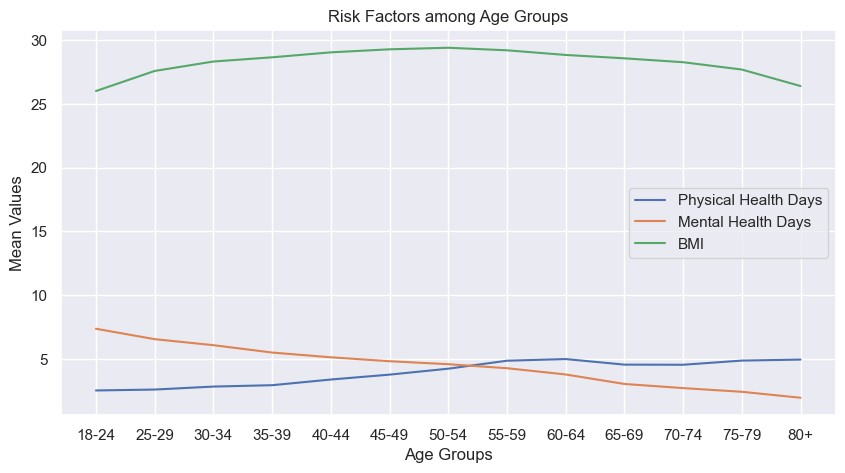

In [41]:
#EDA Step 6 Comparative Analysis
plt.figure(figsize=(10, 5))

ax = sns.lineplot(data=health_factor_byage, x='AgeCategory', y='PhysicalHealthDays', label='Physical Health Days')
ax = sns.lineplot(data=health_factor_byage, x='AgeCategory', y='MentalHealthDays', label='Mental Health Days')
ax = sns.lineplot(data=health_factor_byage, x='AgeCategory', y='BMI', label='BMI')

plt.title('Risk Factors among Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Mean Values')
plt.legend()

array([[<Axes: title={'center': 'PhysicalHealthDays'}>,
        <Axes: title={'center': 'MentalHealthDays'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'HadDepressiveDisorder'}>]], dtype=object)

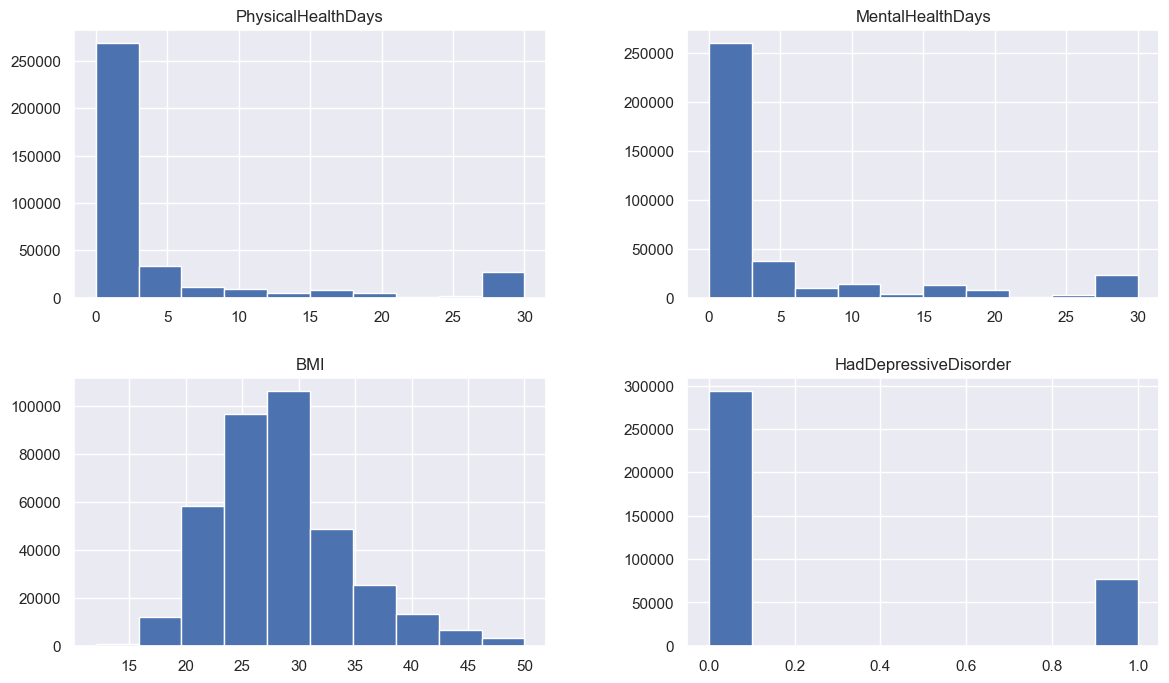

In [42]:
#EDA step 7 Univariate analysis
health_factor=df[['PhysicalHealthDays', 'MentalHealthDays', 'BMI',"HadDepressiveDisorder"]]
health_factor.hist(figsize=(14,8))

In [43]:
lifestyle_factor=df[['SmokerStatus', 'AlcoholDrinkers', 'PhysicalActivities','SleepHours']]

In [44]:
#Data cleaning 9: Feature engineering
def categorize_sleep_hours(hours):
    if hours < 5:
        return 'Very Short'
    elif 5 <= hours <= 6:
        return 'Short'
    elif 7 <= hours <= 8:
        return 'Recommended'
    elif 9 <= hours <= 10:
        return 'Long'
    else:
        return 'Very Long'

df['SleepCategory'] = df['SleepHours'].apply(categorize_sleep_hours)
sleep_cat_order = ['Very Short', 'Short', 'Recommended', 'Long', 'Very Long']

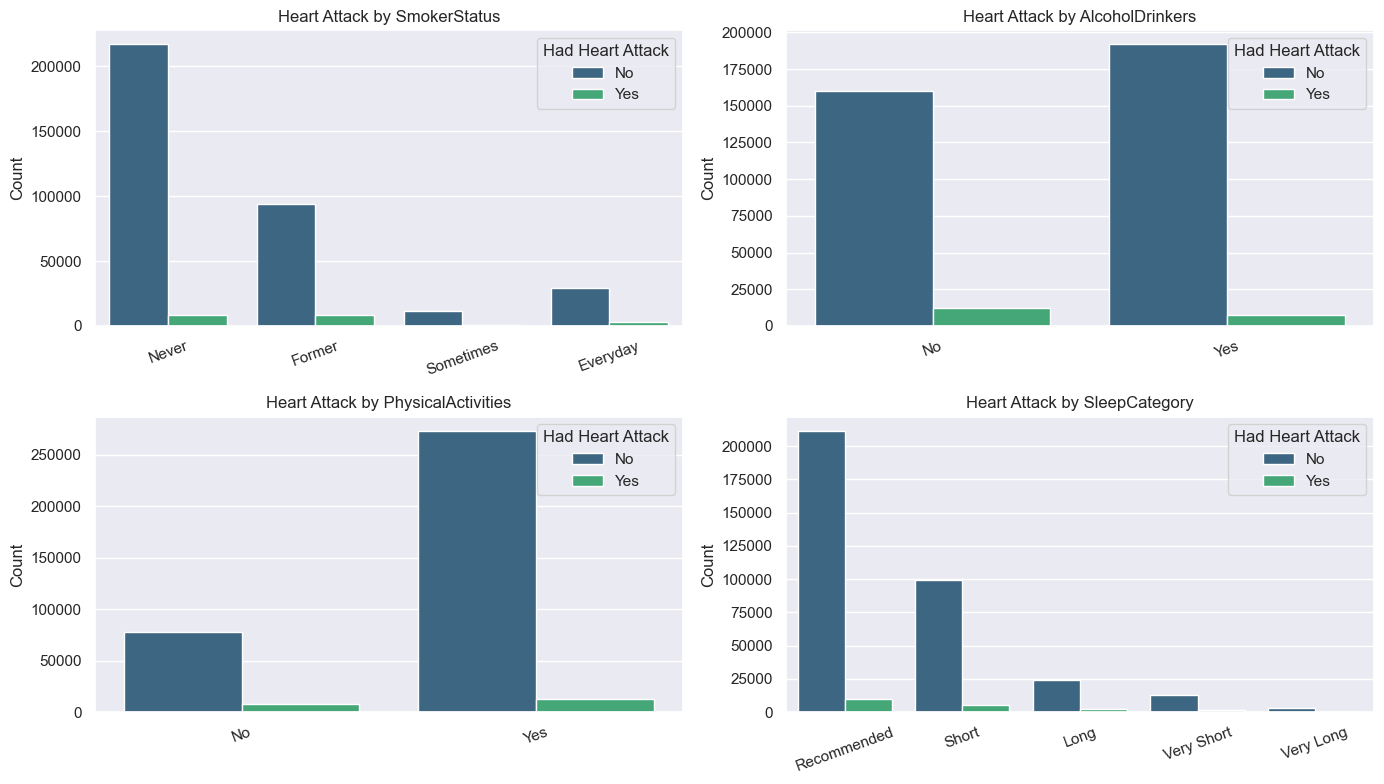

In [45]:
#EDA step 8 Univariate analysis
lifestyle_factors = ['SmokerStatus', 'AlcoholDrinkers', 'PhysicalActivities', 'SleepCategory'] 

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

for ax, factor in zip(axes, lifestyle_factors):
    sns.countplot(x=factor, hue='HadHeartAttack', data=df, palette='viridis', ax=ax)
    ax.set_title(f'Heart Attack by {factor}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=20)
    ax.legend(title='Had Heart Attack')

plt.tight_layout()
plt.show()


In [46]:
#Data cleaning step 10: column rearrange
df['HadHeartAttackNumeric'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HadDepressiveDisorder,BMI,HadHeartAttackNumeric
count,371460.000000,371460.000000,371460.000000,371460.000000,371460.000000,371460.000000
mean,4.096988,4.224439,7.027010,0.208082,28.306014,0.053904
std,8.422598,8.196573,1.454334,0.405936,5.777302,0.225828
min,0.000000,0.000000,1.000000,0.000000,12.020000,0.000000
25%,0.000000,0.000000,6.000000,0.000000,24.330000,0.000000
50%,0.000000,0.000000,7.000000,0.000000,27.890000,0.000000
75%,3.000000,4.000000,8.000000,0.000000,31.250000,0.000000
max,30.000000,30.000000,24.000000,1.000000,50.000000,1.000000


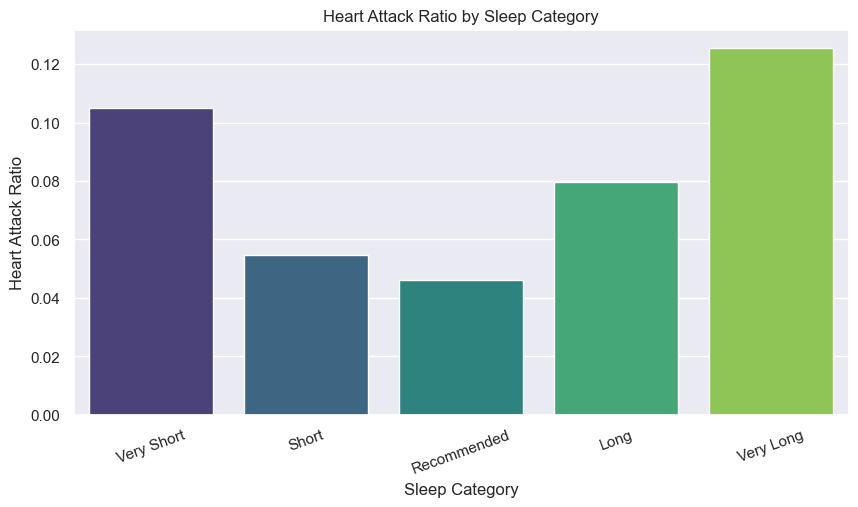

In [47]:
#EDA Step 9 comparative analysis
heart_attack_ratio = df.groupby('SleepCategory')['HadHeartAttackNumeric'].mean().reset_index()

sleep_cat_order = ['Very Short', 'Short', 'Recommended', 'Long', 'Very Long']
heart_attack_ratio['SleepCategory'] = pd.Categorical(heart_attack_ratio['SleepCategory'], categories=sleep_cat_order, ordered=True)
heart_attack_ratio = heart_attack_ratio.sort_values('SleepCategory')

plt.figure(figsize=(10, 5))
sns.barplot(x='SleepCategory', y='HadHeartAttackNumeric', data=heart_attack_ratio, palette='viridis')
plt.title('Heart Attack Ratio by Sleep Category')
plt.xlabel('Sleep Category')
plt.ylabel('Heart Attack Ratio')
plt.xticks(rotation=20)
plt.show()

In [48]:
df['HadDiabetes'] = df['HadDiabetes'].replace({
    'Yes':1,
    'No':0,
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but only during pregnancy (female)': 0 
})

In [49]:
chronic_diseases= df[['HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD', 'HadArthritis', 'HadDiabetes', 'HadKidneyDisease']]

In [50]:
chronic_diseases_corr=df[['HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD', 'HadArthritis', 'HadDiabetes', 'HadKidneyDisease','HadHeartAttack']]
chronic_diseases['HadDiabetes'].unique()

array([1, 0])

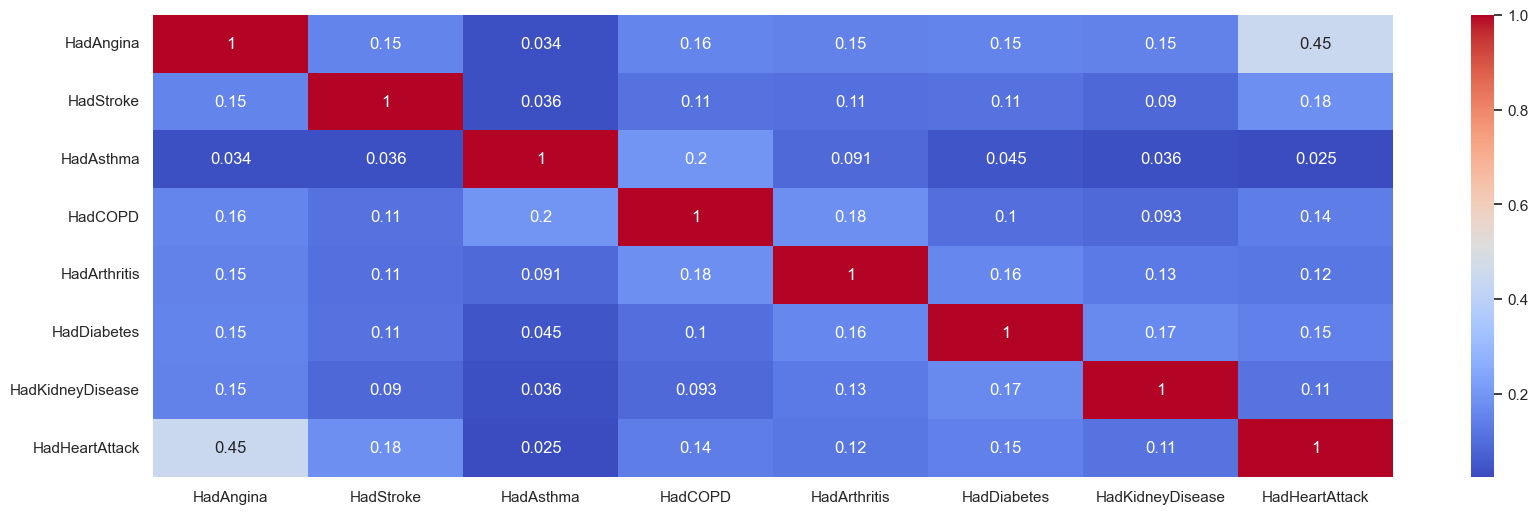

In [52]:
chronic_diseases_numeric = chronic_diseases_corr.replace({'Yes': 1, 'No': 0})

corr_matrix = chronic_diseases_numeric.corr()
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.rcParams['figure.figsize'] = (18, 6)
plt.show()


In [53]:
chronic_diseases_long= df.melt(id_vars=['HadHeartAttack'], 
                                value_vars=['HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD', 'HadArthritis', 'HadDiabetes', 'HadKidneyDisease'],
                                var_name='Disease', value_name='DiseaseStatus')
chronic_diseases_long = chronic_diseases_long[chronic_diseases_long['DiseaseStatus'] == 'Yes']


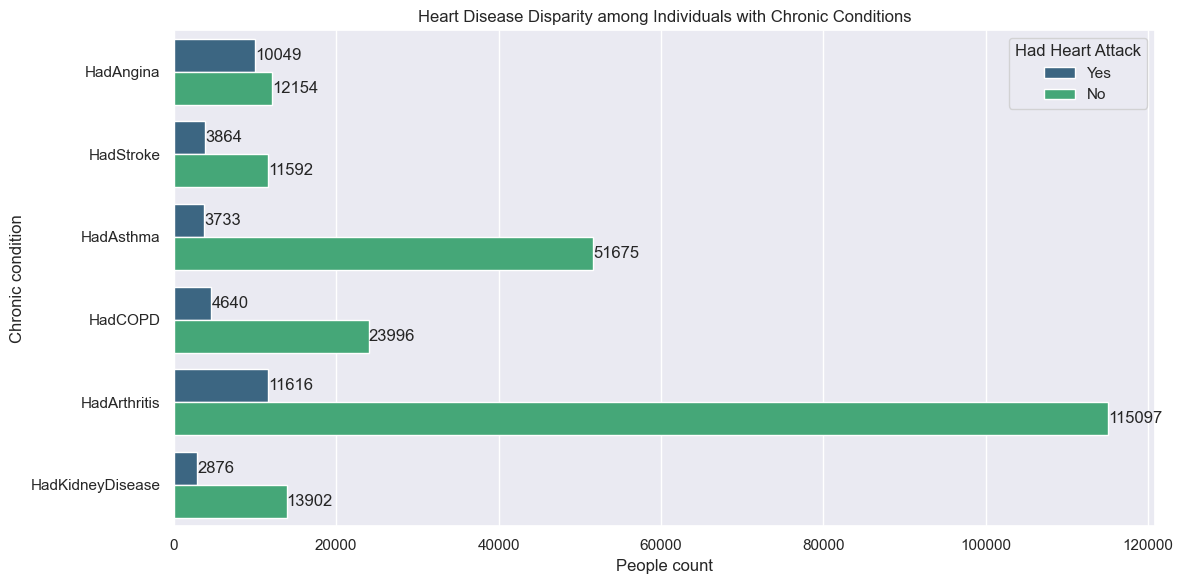

In [54]:
#EDA step 10 
sns.set(style='darkgrid')
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=chronic_diseases_long, y='Disease', hue='HadHeartAttack', palette='viridis')
ax.set_title('Heart Disease Disparity among Individuals with Chronic Conditions')
ax.set_xlabel('People count')
ax.set_ylabel('Chronic condition')
plt.legend(title='Had Heart Attack')

for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()
